<a href="https://colab.research.google.com/github/shreydawg23/ECE1895_FinalProject/blob/main/ECE1895_JuniorDesign_TradingBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE1895 Junior Design - Design Project 3
Python Trading Bot created by Shreyas Vivekanandan

#How to run code


1.   Click Connect in top right corner to activate VM
2.   Click Runtime
3.   Click Run All
4.   Scroll down to enter what ticker you would like to see 
5.   Thats it! Everything else will be done for you. 





#Install packages and dependencies:

*   alpaca-trade-api
*   backtrader
*alpaca backtrader api

The alpaca trade api is an interface that allows you to trade automatically with the stock broker Alpaca. More specifically, the trading API allows you to send orders directly to Alpaca's servers to automate the process of trading, bypassing a traditional client. With this, I am able to get real time market information and am able to chart these tickers.

https://alpaca.markets/docs/








In [ ]:
!pip install alpaca-trade-api
!pip install backtrader
!pip install alpaca_backtrader_api


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.1 MB/s 
     |████████████████████████████████| 106 kB 71.3 MB/s 
     |████████████████████████████████| 322 kB 46.5 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.4
    Uninstalling msgpack-1.0.4:
      Successfully uninstalled msgpack-1.0.4
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.4 MB/s 
     |████████████████████████████████| 302 kB 

Set API websocket using account key, secret key, and URL websocket

In [ ]:
import alpaca_trade_api as alpaca


api = alpaca.REST('PK80TAZMKNWDRL1YSDIC', 'h8EnTTRSjjkgzeWldWcPNe4bXaQONgk2aiyHd2sN', "https://paper-api.alpaca.markets")

Show account information


In [ ]:
api.get_account()

Account({   'account_blocked': False,
    'account_number': 'PA3FSNZKJ9IT',
    'accrued_fees': '0',
    'balance_asof': '2022-12-16',
    'bod_dtbp': '0',
    'buying_power': '101291.93',
    'cash': '291.18',
    'created_at': '2022-10-31T20:24:45.558013Z',
    'crypto_status': 'ACTIVE',
    'crypto_tier': 0,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'effective_buying_power': '101291.93',
    'equity': '101000.75',
    'id': '9c3df13c-4502-4a60-ba57-644d7ee56e41',
    'initial_margin': '50354.785',
    'last_equity': '102022.61',
    'last_maintenance_margin': '30519.43',
    'long_market_value': '100709.57',
    'maintenance_margin': '30212.871',
    'multiplier': '2',
    'non_marginable_buying_power': '48645.96',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'portfolio_value': '101000.75',
    'position_market_value': '100709.57',
    'regt_buying_power': '101291.93',
    'short_market_value': '0',
    'shorting_

use get api method to retrieve data of ticker




In [ ]:
from datetime import date

today = date.today()

date = today.strftime("%Y-%m-%d")


ticker = input('Enter Ticker: ')



Enter Ticker: amzn


import plotly library to use graphing objects to plot the recently acquired data
import numpy to apply mathmatical equations on data
import pandas for more data extrapolation and manipulation


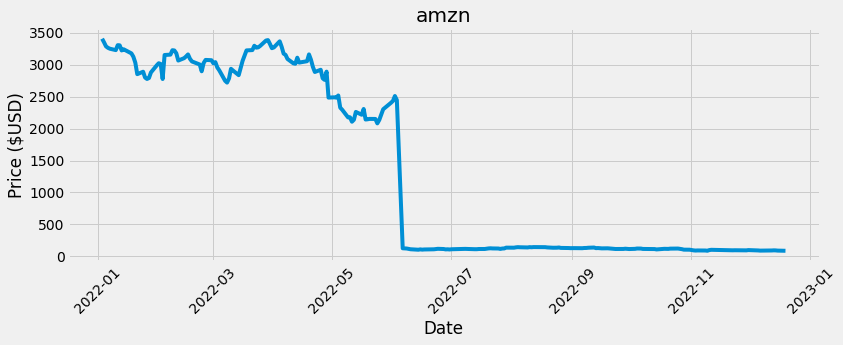

In [ ]:
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

from plotly.subplots import make_subplots
from alpaca_trade_api import REST, TimeFrame

#get historical data of the last year
df = api.get_bars(symbol=ticker, start = "2022-01-01",timeframe = '1Day', limit = 355).df

#set the date as the index in our table
df['Date'] = df.index.date
df['Time'] = df.index.time
df.set_index(df['Date'])

#graph data

plt.figure(figsize = (12,4))
plt.plot(df.close)
plt.title(ticker)
plt.xlabel('Date')
plt.ylabel('Price ($USD)')

plt.xticks(rotation=45)
plt.show()



Below we are calculating Fibonacci Retracement Levels based on the datas min and max.

Fibonacci retracement is a method of technical analysis for determining support and resistance levels. It is named after the Fibonacci sequence of numbers, whose ratios provide price levels to which markets tend to retrace a portion of a move, before a trend continues in the original direction. There are many other ratio levels people use but I decided to stick to the main 5 with the .618 ratio being the most important as its know as the "golden ratio."

In [ ]:
#Calculate Fibonacci Retracement Levels

max_price = df['close'].max()
min_price = df['close'].min()

#diffenece between the max and min to create ratio levels calculated in the next step
difference = max_price - min_price

l1 = max_price- difference *0.236
l2 = max_price - difference * 0.382
l3 = max_price - difference * 0.5
l4 = max_price - difference * 0.618 
l5 = max_price - difference * 0.786




In this step we are calculating the datas Exponential Moving Averages(EMA) in the short and long term to be used in the Moving Averages Convergence/Divergence. I first calculated the short EMA using a 12 day average and then calculated the longEMA using the 26 day average as this is a common standard. From there we subtract the short from the long to get the EMA which is now used to calculate the signal line. The signal line is the moving average of the MACD and we use the 9 day average as this is standard. 

In [ ]:
#Calculate MACD lines, Signal Lines, EMA


#Short Term Exponential Moving Average(EMA)
shortEMA = df.close.ewm(span = 12, adjust = False).mean()

#Long Term Exponential Moving Average
longEMA = df.close.ewm(span = 26, adjust = False).mean()

#Calc EMA Convergence and Divergance
MACD = shortEMA - longEMA

#Signal line calculation
sig = MACD.ewm(span = 9, adjust = False).mean()


In this step we plot all the data calculated in the previous step using matplotlib.pyplot


(array([738156., 738215., 738276., 738337., 738399., 738460., 738521.]),
 <a list of 7 Text major ticklabel objects>)

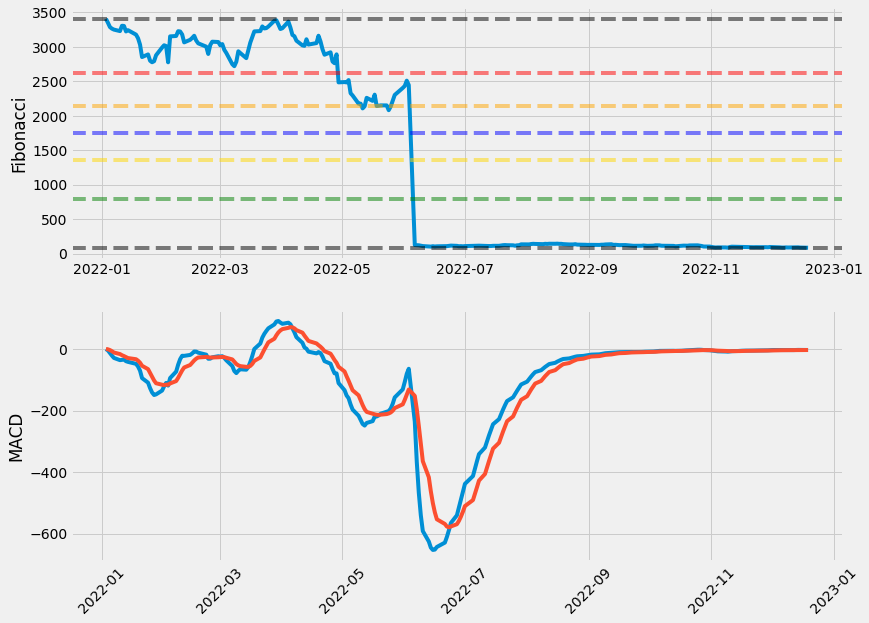

In [ ]:
#Plot Fibs,MACD, signal

new_df = df

#Fibs plot
plt.figure(figsize=(12.33,9.5))
plt.subplot(2,1,1)

plt.plot(new_df.index, new_df['close'])

plt.axhline(max_price, linestyle = '--', alpha=0.5, color ='black')
plt.axhline(l1, linestyle = '--', alpha=0.5, color ='red')
plt.axhline(l2, linestyle = '--', alpha=0.5, color ='orange')
plt.axhline(l3, linestyle = '--', alpha=0.5, color ='blue')
plt.axhline(l4, linestyle = '--', alpha=0.5, color ='gold')
plt.axhline(l5, linestyle = '--', alpha=0.5, color ='green')
plt.axhline(min_price, linestyle = '--', alpha=0.5, color ='black')
plt.ylabel('Fibonacci')

#Plot the MACD and Signal
plt.subplot(2,1,2)
plt.plot(new_df.index, MACD)
plt.plot(new_df.index, sig)
plt.ylabel('MACD')
plt.xticks(rotation = 45)


In [ ]:
#Create columns for data frame for signal in our dataset

df['MACD'] = MACD
df['Signal Line'] = sig

df




,open,high,low,close,volume,trade_count,vwap,Date,Time,MACD,Signal Line
timestamp,,,,,,,,,,,
2022-01-03 05:00:00+00:00,3351.000,3414.0700,3323.2100,3408.09,3192069,187619,3389.105982,2022-01-03,05:00:00,0.000000,0.000000
2022-01-04 05:00:00+00:00,3408.760,3428.0000,3326.9900,3350.44,3533192,216128,3358.544328,2022-01-04,05:00:00,-4.598860,-0.919772
2022-01-05 05:00:00+00:00,3337.660,3342.5250,3287.4775,3288.00,2928413,208396,3314.418692,2022-01-05,05:00:00,-13.130516,-3.361921
2022-01-06 05:00:00+00:00,3269.010,3296.0000,3238.7442,3265.08,2592981,187193,3268.051841,2022-01-06,05:00:00,-21.493602,-6.988257
2022-01-07 05:00:00+00:00,3276.780,3304.8650,3240.6200,3251.08,2325632,156769,3259.961282,2022-01-07,05:00:00,-28.917746,-11.374155
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13 05:00:00+00:00,95.230,96.2500,90.5200,92.49,99913295,770459,93.134179,2022-12-13,05:00:00,-3.032338,-3.521592
2022-12-14 05:00:00+00:00,92.502,93.4581,89.8700,91.58,69980966,539361,92.123069,2022-12-14,05:00:00,-2.817793,-3.380833
2022-12-15 05:00:00+00:00,89.890,89.9700,87.4700,88.45,84802877,698193,88.409907,2022-12-15,05:00:00,-2.867278,-3.278122


In [ ]:
#function to be used in strat to get upper/lower fibs based on where current price is trading

def getFibLevels(price):
  if price >= l1:
    return(max_price, l1)
  elif price >= l2:
    return(l1,l2)
  elif price >=l3:
    return(l2,l3)
  elif price >=l4:
    return(l3,l4)
  elif price >= l5:
    return(l4,l5)
  else:
    return(l5,min_price)


Function for my trading strategy

1) When signal line crosses ABOVE the MACD Line and the current price corssed above or below the last fibs level then BUY

2) When signal line crosses BELOW the MACD Line and then current price crossed above or below the last fibs level then SELL

3) Never sell at a price thats lower than what I bought it at


function returns buy and sell arrays for each trade

In [ ]:

def strategy_algo(df):

  buy_list = []
  sell_list = []

  flag = 0 #flag for buy or sell 0 - SELL 1 - BUY

  last_buy_price = 0;

  #loop through the data
  for i in range(0, df.shape[0]):
    price = df['close'][i]

    #if this is the first data point within the data set, then get the level above or below it
    if i == 0:
      upper_lvl, lower_lvl = getFibLevels(price)
      buy_list.append(np.nan)
      sell_list.append(np.nan)
    
    #else if the current price is greater than or equal to the upper_lvl, or less than or equal to the lower_lvl then we know price has hit/crossed a new fib level
    elif price >= upper_lvl or price <= lower_lvl:

      #Check if MACD line crossed above or below the signal line
      if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
        last_buy_price = price
        buy_list.append(price)
        sell_list.append(np.nan)

        flag = 1

      elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
        buy_list.append(np.nan)
        sell_list.append(price)

        flag = 0
      
      else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)
    
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
      
      #update new levels
      upper_lvl, lower_lvl = getFibLevels(price)
  
  return buy_list, sell_list




In [ ]:
#Create buy and sell columns


buy, sell = strategy_algo(df)

df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell

df

,open,high,low,close,volume,trade_count,vwap,Date,Time,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
timestamp,,,,,,,,,,,,,
2022-01-03 05:00:00+00:00,3351.000,3414.0700,3323.2100,3408.09,3192069,187619,3389.105982,2022-01-03,05:00:00,0.000000,0.000000,NaN,NaN
2022-01-04 05:00:00+00:00,3408.760,3428.0000,3326.9900,3350.44,3533192,216128,3358.544328,2022-01-04,05:00:00,-4.598860,-0.919772,NaN,NaN
2022-01-05 05:00:00+00:00,3337.660,3342.5250,3287.4775,3288.00,2928413,208396,3314.418692,2022-01-05,05:00:00,-13.130516,-3.361921,NaN,NaN
2022-01-06 05:00:00+00:00,3269.010,3296.0000,3238.7442,3265.08,2592981,187193,3268.051841,2022-01-06,05:00:00,-21.493602,-6.988257,NaN,NaN
2022-01-07 05:00:00+00:00,3276.780,3304.8650,3240.6200,3251.08,2325632,156769,3259.961282,2022-01-07,05:00:00,-28.917746,-11.374155,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13 05:00:00+00:00,95.230,96.2500,90.5200,92.49,99913295,770459,93.134179,2022-12-13,05:00:00,-3.032338,-3.521592,NaN,NaN
2022-12-14 05:00:00+00:00,92.502,93.4581,89.8700,91.58,69980966,539361,92.123069,2022-12-14,05:00:00,-2.817793,-3.380833,NaN,NaN
2022-12-15 05:00:00+00:00,89.890,89.9700,87.4700,88.45,84802877,698193,88.409907,2022-12-15,05:00:00,-2.867278,-3.278122,NaN,NaN


Text(0.5, 1.0, 'amzn')

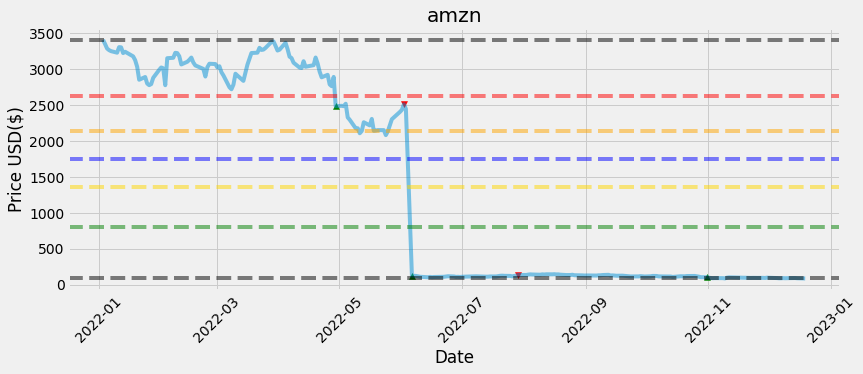

In [ ]:
#Plot fibs levels along with close price and with the buy and sell signals

new_df = df

#Fibs plot
plt.figure(figsize=(12.33,4.5))

plt.plot(new_df.index, new_df['close'], alpha = 0.5)

plt.scatter(new_df.index, new_df['Buy_Signal_Price'], color = 'green', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell_Signal_Price'], color = 'red', marker = 'v', alpha = 1)

plt.axhline(max_price, linestyle = '--', alpha=0.5, color ='black')
plt.axhline(l1, linestyle = '--', alpha=0.5, color ='red')
plt.axhline(l2, linestyle = '--', alpha=0.5, color ='orange')
plt.axhline(l3, linestyle = '--', alpha=0.5, color ='blue')
plt.axhline(l4, linestyle = '--', alpha=0.5, color ='gold')
plt.axhline(l5, linestyle = '--', alpha=0.5, color ='green')
plt.axhline(min_price, linestyle = '--', alpha=0.5, color ='black')
plt.ylabel('Price USD($)')
plt.xlabel('Date')
plt.xticks(rotation = 45)

plt.title(ticker)



In [ ]:
#Calculate return rate for each buy and sell cycle as well as the average of each in the year

buy_nums = [item for item in buy if not(math.isnan(item)) == True]

sell_nums = [item for item in sell if not(math.isnan(item)) == True]

print(buy_nums)
print(sell_nums)



[2485.63, 124.79, 102.44]
[2510.22, 134.95]
